Prophet, developed by Meta (Facebook), is a robust and easy-to-use time series forecasting tool. It's ideal for data with:

Trend

Seasonality

Holiday effects

Prophet automatically handles missing data, outliers, and daily/weekly/yearly patterns — perfect for business forecasting tasks.

In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

In [2]:
# Download stock data (e.g., Tesla)
df = yf.download("TSLA", start="2022-01-01", end="2025-06-16")
data = df.reset_index()[["Date", "Close"]]
data.columns = ["ds", "y"]  # Prophet expects columns: ds (date), y (value)


<ipython-input-2-2064095027>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-06-16")
[*********************100%***********************]  1 of 1 completed


In [3]:
# Initialise and fit Prophet model
model = Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpy9d3m3/fyvmk5_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpy9d3m3/m4gk_0eu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97263', 'data', 'file=/tmp/tmphpy9d3m3/fyvmk5_j.json', 'init=/tmp/tmphpy9d3m3/m4gk_0eu.json', 'output', 'file=/tmp/tmphpy9d3m3/prophet_model559ua08l/prophet_model-20250617154451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
# Create future dataframe (next 60 days)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)



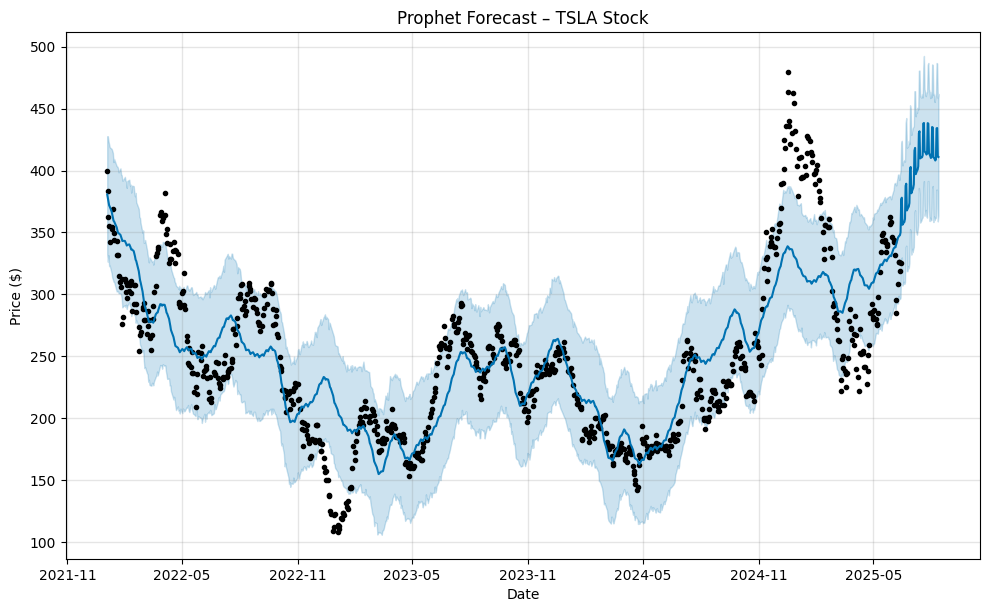

In [6]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title("Prophet Forecast – TSLA Stock")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

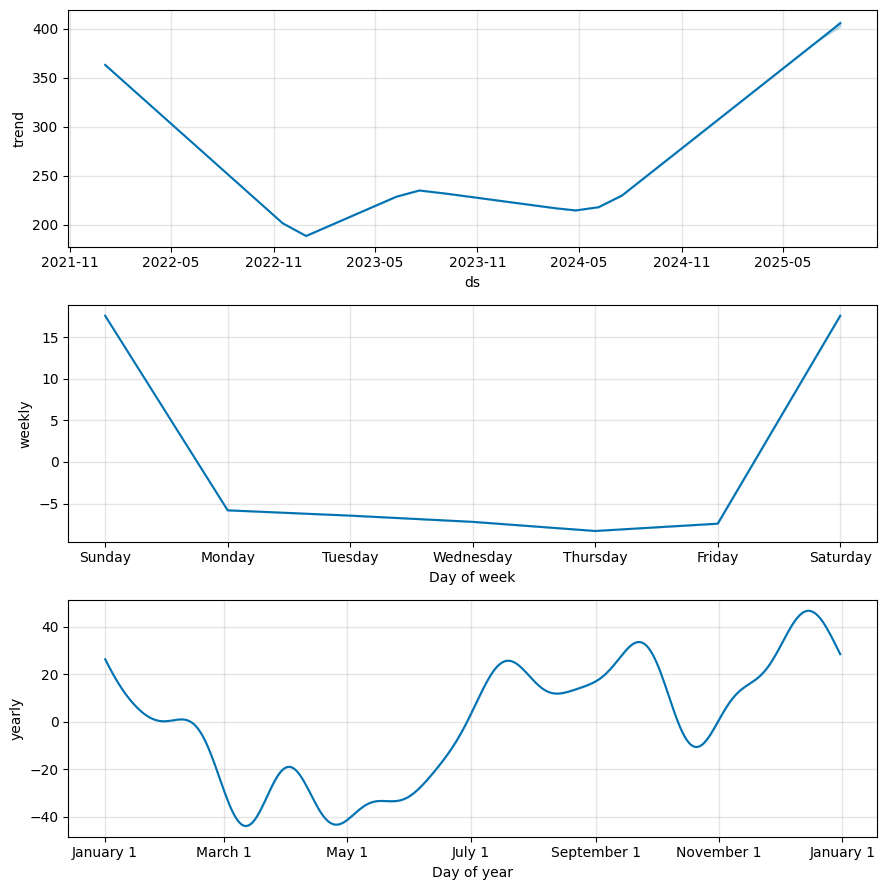

In [7]:
# Optional: plot trend + seasonality components
fig2 = model.plot_components(forecast)
plt.show()